# Final project

In [22]:
import geopandas
import pandas

import pathlib

In [23]:
# downloading data


NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data" 

# Read file using gpd.read_file()
bird_data = geopandas.read_file(DATA_DIRECTORY / "HBF_107404_geo.gpkg")

In [24]:
bird_data.head(2)

,record_id,record_order,reported_name,record_issue,record_issue_source,record_issue_message,reported_taxon_confidence,taxon_id,taxonomic_order,scientific_name_interpreted,...,document_notes,document_media_count,record_fact__Havainnon_laatu,record_fact__Havainnon_määrän_yksikkö,record_fact__Museo_johon_lajista_kerätty_näyte_on_talletettu,event_fact__Vesistöalue,event_fact__Sijainnin_tarkkuusluokka,event_fact__Pesintätulos,document_fact__Seurattava_laji,geometry
0,http://tun.fi/KE.67/10388317#Unit,0,TURPIL,None,None,None,None,http://tun.fi/MX.33117,12285,Turdus pilaris,...,None,0,None,None,None,None,None,None,None,POINT (381127.804 6783003.343)
1,http://tun.fi/KE.67/10388318#Unit,0,TURPIL,None,None,None,None,http://tun.fi/MX.33117,12285,Turdus pilaris,...,None,0,None,None,None,None,None,None,None,POINT (381127.804 6783003.343)


In [25]:
bird_data.count()

record_id                               21488
record_order                            21488
reported_name                           21488
record_issue                                0
record_issue_source                         0
                                        ...  
event_fact__Vesistöalue                     0
event_fact__Sijainnin_tarkkuusluokka        0
event_fact__Pesintätulos                    0
document_fact__Seurattava_laji              0
geometry                                21488
Length: 123, dtype: int64

In [26]:
# bird_data["date_begin"]

the_cols = [col for col in bird_data.columns if 'date' in col]
print(list(bird_data.columns))
print(the_cols)

['record_id', 'record_order', 'reported_name', 'record_issue', 'record_issue_source', 'record_issue_message', 'reported_taxon_confidence', 'taxon_id', 'taxonomic_order', 'scientific_name_interpreted', 'common_name_finnish', 'common_name_english', 'common_name_swedish', 'red_list_status', 'threatened_status', 'regulatory_status_finnish', 'informal_groups_finnish', 'informal_groups_english', 'taxon_checklist', 'abundance_verbatim', 'abundance_unit', 'annotated_taxon_id', 'abundance_interpreted', 'pair_abundance', 'invasive_control_class', 'record_quality', 'record_derived_tags', 'superrecord_basis', 'record_basis', 'type_specimen', 'determiner', 'sex', 'life_stage', 'is_wild', 'is_alive', 'local', 'record_keywords', 'is_breeding_location', 'plant_status_code', 'atlas_code_id', 'atlas_class_id', 'individual_id', 'record_notes', 'record_annotation_count', 'record_media_count', 'sample_count', 'event_id', 'event_order', 'section', 'event_issue', 'event_issue_source', 'event_issue_message', 

In [27]:
bird_data_clean = bird_data[["record_id", "record_order", "reported_name", "scientific_name_interpreted", 'common_name_english', 'date_start', 'date_end', 'formatted_date_time', 'year', "geometry"]]

In [29]:
bird_data_clean.head()

,record_id,record_order,reported_name,scientific_name_interpreted,common_name_english,date_start,date_end,formatted_date_time,year,geometry
0,http://tun.fi/KE.67/10388317#Unit,0,TURPIL,Turdus pilaris,Fieldfare,2015-06-02,2015-06-02,2015-06-02 [8],2015,POINT (381127.804 6783003.343)
1,http://tun.fi/KE.67/10388318#Unit,0,TURPIL,Turdus pilaris,Fieldfare,2015-06-02,2015-06-02,2015-06-02 [12],2015,POINT (381127.804 6783003.343)
2,http://tun.fi/KE.67/10388319#Unit,0,TURPIL,Turdus pilaris,Fieldfare,2015-06-02,2015-06-02,2015-06-02 [12],2015,POINT (381127.804 6783003.343)
3,http://tun.fi/KE.67/10394498#Unit,0,TURPIL,Turdus pilaris,Fieldfare,2015-06-02,2015-06-02,2015-06-02,2015,POINT (391791.613 6671570.333)
4,http://tun.fi/KE.67/10394499#Unit,0,TURMER,Turdus merula,Common Blackbird,2015-06-07,2015-06-07,2015-06-07,2015,POINT (390811.648 6669742.101)


In [30]:
bird_data_clean["scientific_name_interpreted"].unique()

array(['Turdus pilaris', 'Turdus merula', 'Turdus iliacus',
       'Turdus philomelos', 'Turdus viscivorus', 'Turdus torquatus'],
      dtype=object)

<Axes: >

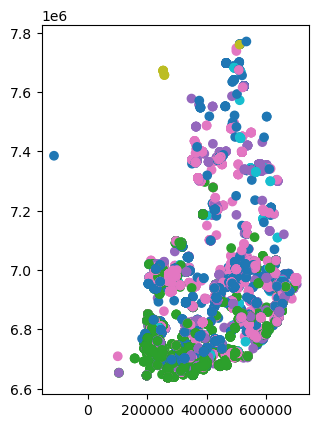

In [31]:
import matplotlib.pyplot as plt

bird_data_clean.plot(column="scientific_name_interpreted")

In [ ]:
# pie chart
import plotly.express as px

fig = px.pie(bird_data_clean, names="scientific_name_interpreted", values="",
              title='Turdus species in Finland in 2024')


In [ ]:
# code

# plot
# a pie chart showing the different Turdus species in 2024 "observations of birds ringed in Finland 
# and reported encounters of the birds"

# Aggregate by year
#sq_data_year = sq_data.groupby('year').size().reset_index(name='Occurrences')


# Create a time series line chart to visualize the trend over the years
fig = px.pie(sq_data_year, names="", values="",
              title='Turdus species in Finland in 2024',
              labels={'year': 'Year', 'Occurrences': 'Observations'},
              color_discrete_sequence=['#B14E20'])  # Color for the line

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Observations'
)

fig.update_layout(
    plot_bgcolor='#D8D1CD',   # Plot area background
    paper_bgcolor='white',  # Entire figure background
    font=dict(
        family='Helvetica, sans-serif',
        size=16,
        color='#2B2725'
    ),
    title_font=dict(
        size=20,
        family='Helvetica',
        color='#2B2725'
    )
)

fig.write_html(DATA_DIRECTORY / "squirrel_chart.html")

# Show the figure
fig.show()



In [ ]:
# map of the most common type? Map of the amount of bird ringings? 

In [ ]:
# code

In [ ]:
# interactive map of something

In [ ]:
# code